In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [2]:
filelist = [fc.sr.NMSSM_MX_700_MY_400,fc.sr.QCD_B_List+[fc.sr.TTJets]]
trees = [ Tree(fnames) for fnames in filelist ]

In [3]:
for tree in trees: tree.calc_btagsum()

In [4]:
print_bovers(trees)

Bkg/Signal: 38.62
=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root']
Total Events:    [484002.0]
Raw Events:      [203326]
Selected Events: 203326
=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT15

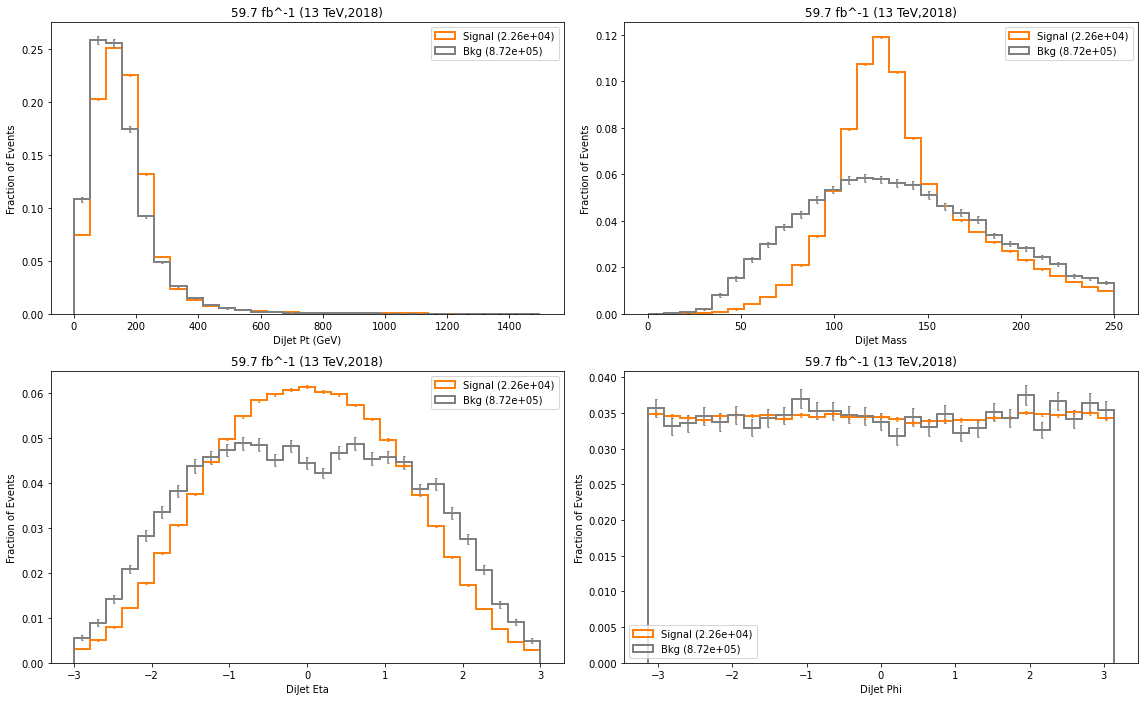

In [5]:
study.higgs(trees,variable="higgs_m",saveas="baseline_norm",density=1)

In [6]:
higgs_mass_cr = lambda tree : Selection(tree,mask=ak.all(np.abs(tree["higgs_m"]-125)>30,axis=-1))
selection_hm_cr = [ higgs_mass_cr(tree) for tree in trees ]

In [7]:
print_bovers(selection_hm_cr)

Bkg/Signal: 59.53
--- all Signal ---
Event Efficiency:   0.23
Selected Purity(6): 0.21
Passed Jet S/T:     0.68
--- all Bkg ---
Event Efficiency:   0.29
------


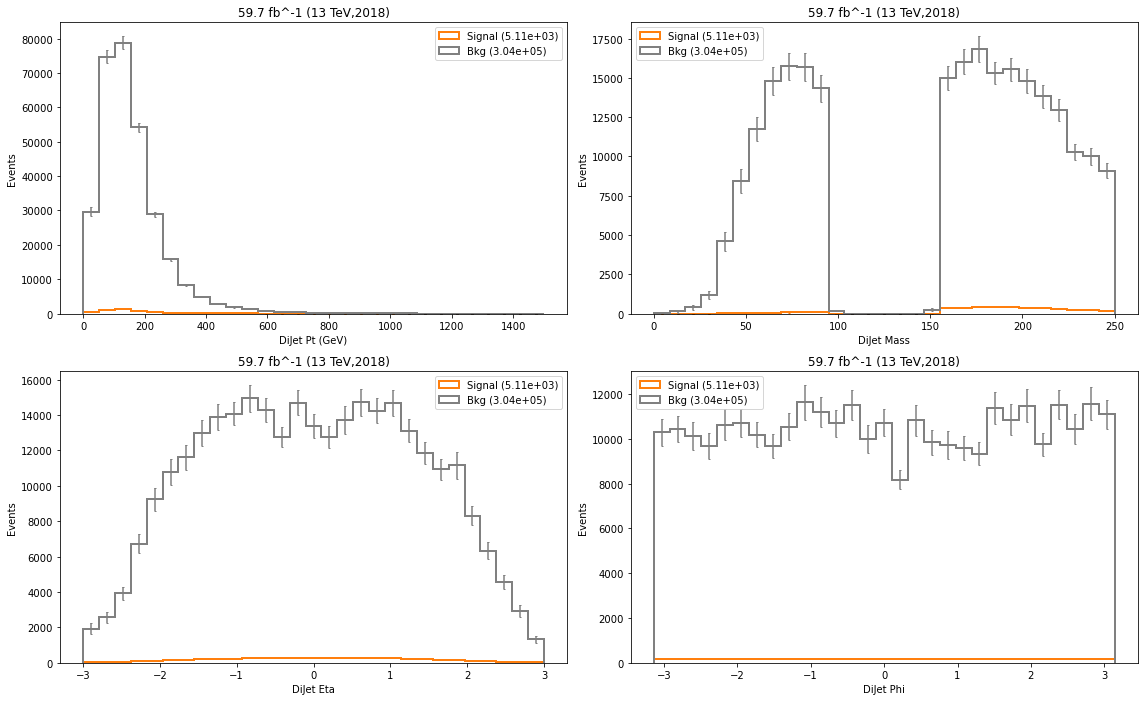

In [8]:
study.higgs(selection_hm_cr,density=0,saveas="higgs_mass_veto")

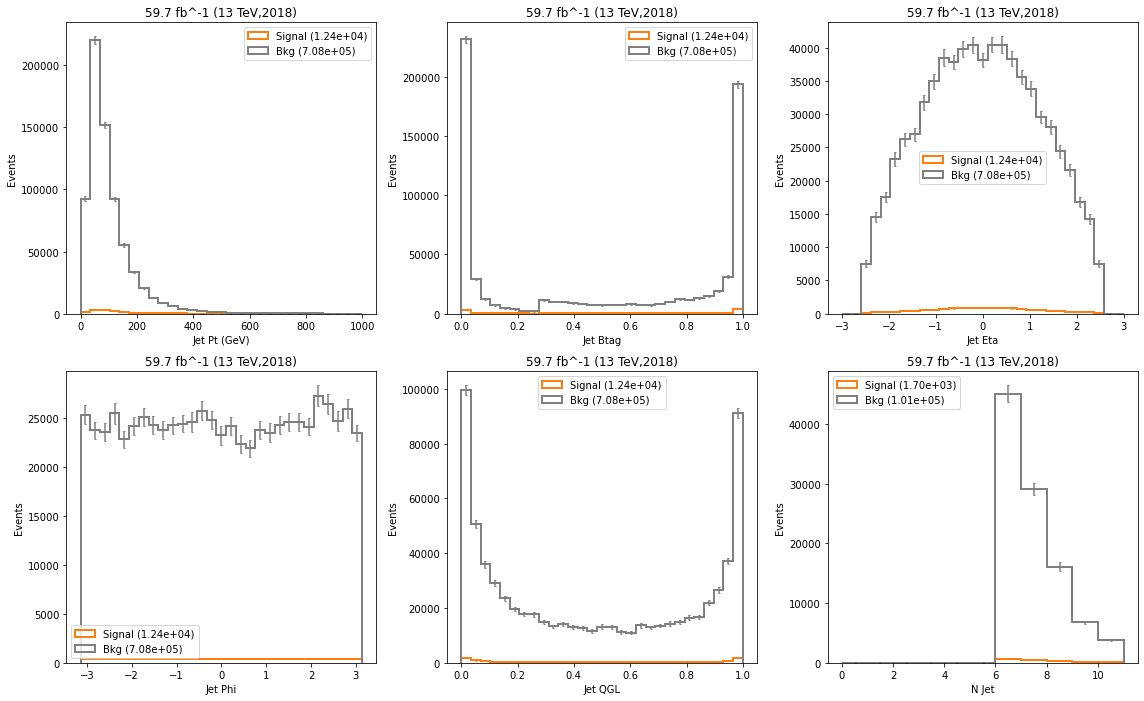

In [9]:
study.jets(selection_hm_cr,density=0,saveas="higgs_mass_veto")

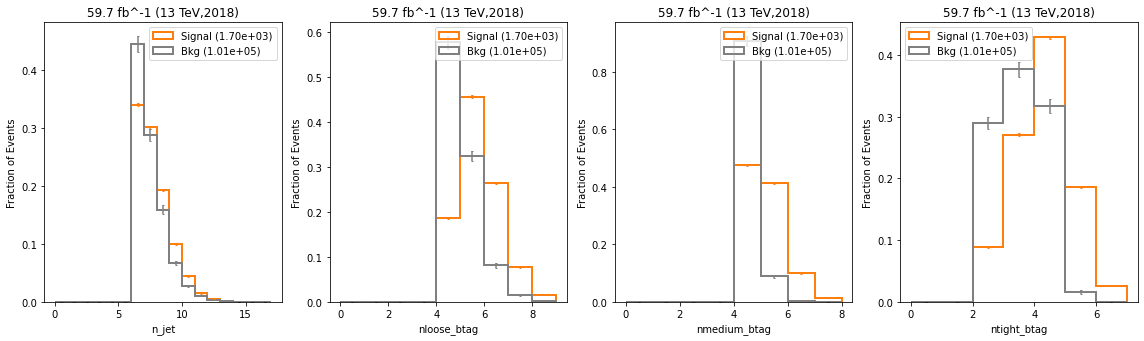

In [10]:
study.njets(selection_hm_cr,density=1,saveas="higgs_mass_veto")

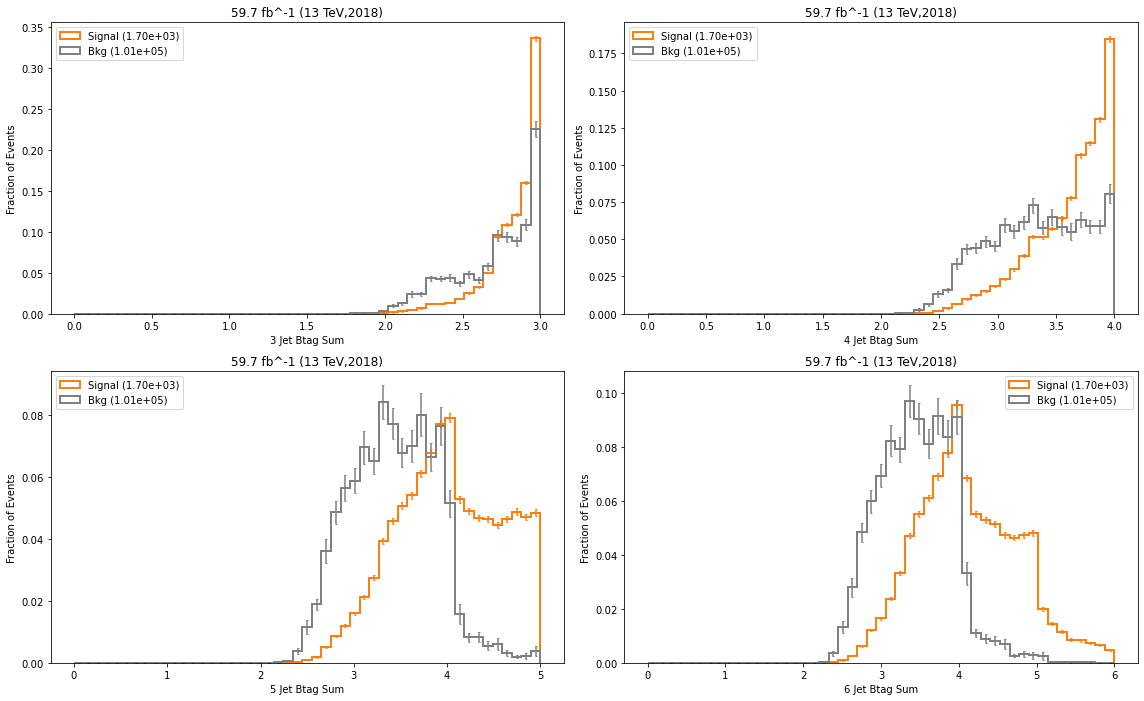

In [11]:
study.njet_var_sum(selection_hm_cr,density=1,saveas="higgs_mass_veto")

In [12]:
# hm_cr_mbtag = [ selection.chosen_jets(cuts={"btagcut":jet_btagWP[mediumWP]}) for selection in selection_hm_cr ]

3.7351459703947367 96.21523906859304


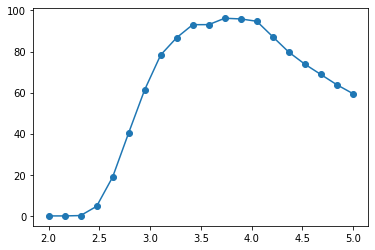

3.8928865131578947 100.86903041813417


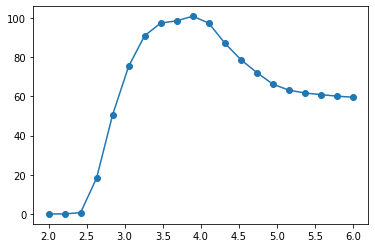

In [13]:
scores = optimize_var_cut(selection_hm_cr,"jet5_btagsum",varmin=2,method=min)
graph_simple(*scores);
plt.show()

scores = optimize_var_cut(selection_hm_cr,"jet6_btagsum",varmin=2,method=min)
graph_simple(*scores);
plt.show()


# scores = optimize_var_cut(hm_cr_mbtag,"n_jet",varmin=4,method=min)
# graph_simple(*scores);

In [18]:
hm_cr_btagsum = [ selection.masked( selection.get("jet6_btagsum") < 3.8 ) for selection in selection_hm_cr ]

In [19]:
print_bovers(hm_cr_btagsum)

Bkg/Signal: 134.58
--- all Signal ---
Event Efficiency:   0.075
Selected Purity(6): 0.11
Passed Jet S/T:     0.66
--- all Bkg ---
Event Efficiency:   0.23
------


[15, 18] 18
[10.0, 10.0] 10
[7.0, 7.0] 7
[4.0, 4.0] 4


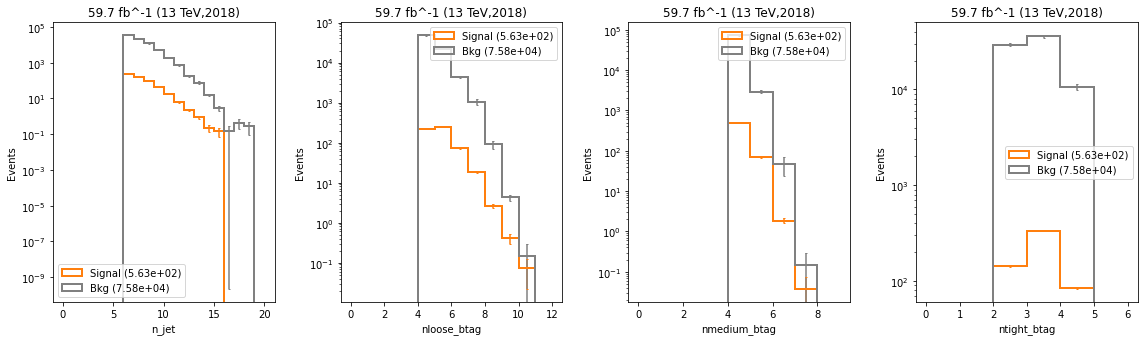

In [37]:
study.njets(hm_cr_btagsum,log=1)

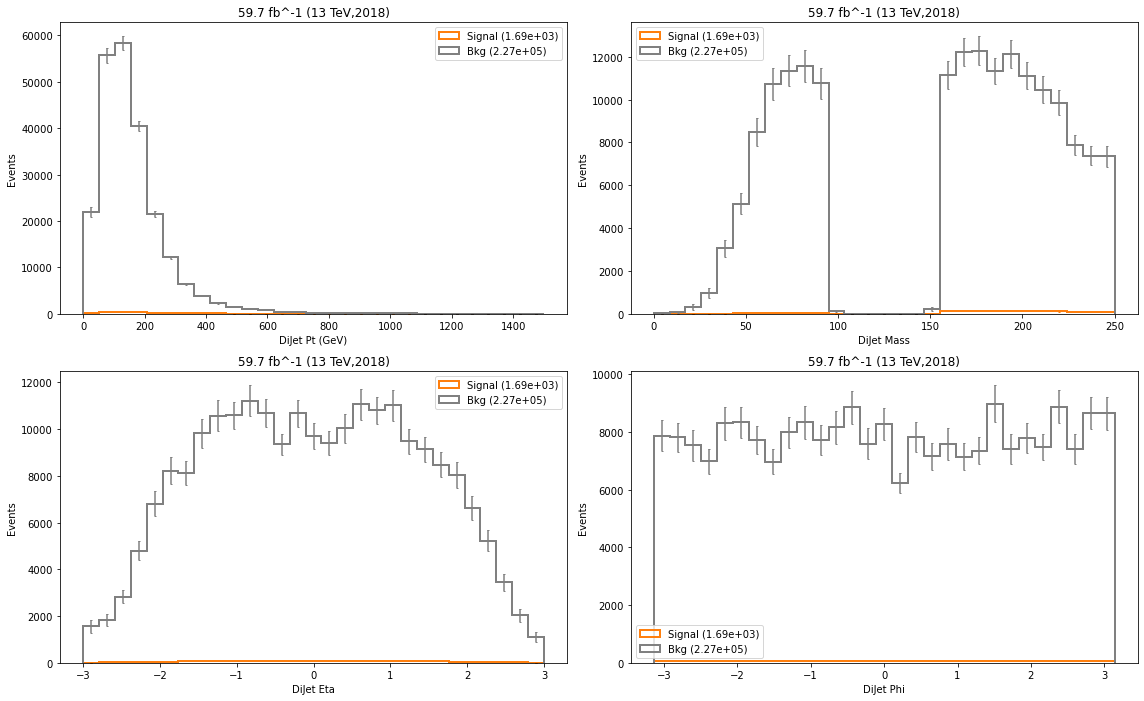

In [20]:
study.higgs(hm_cr_btagsum,saveas="hm_btagsum")

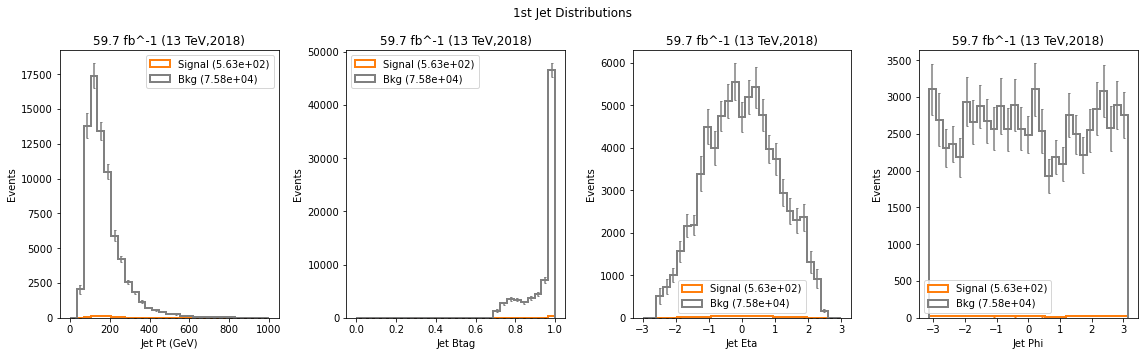

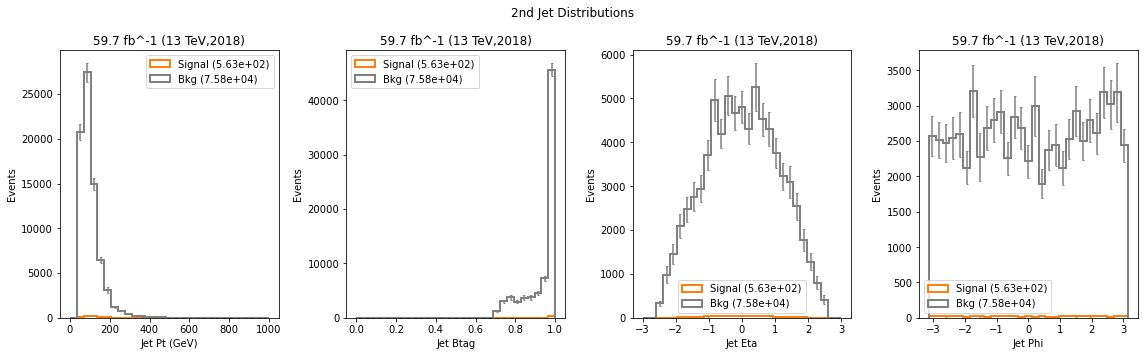

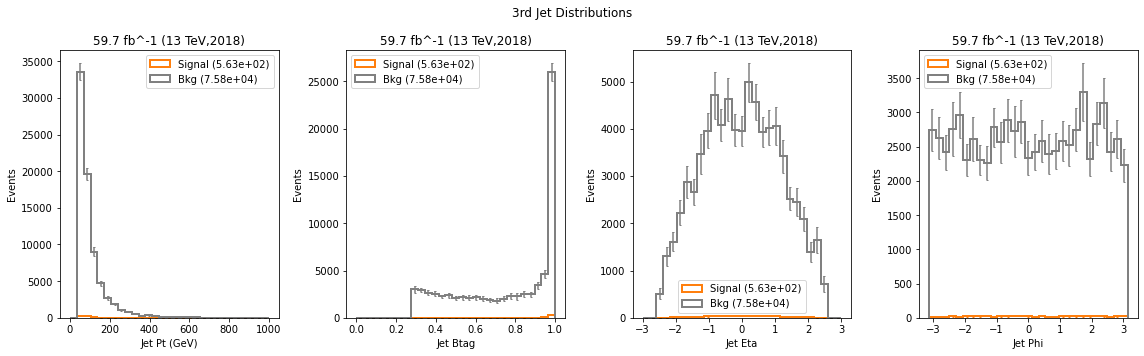

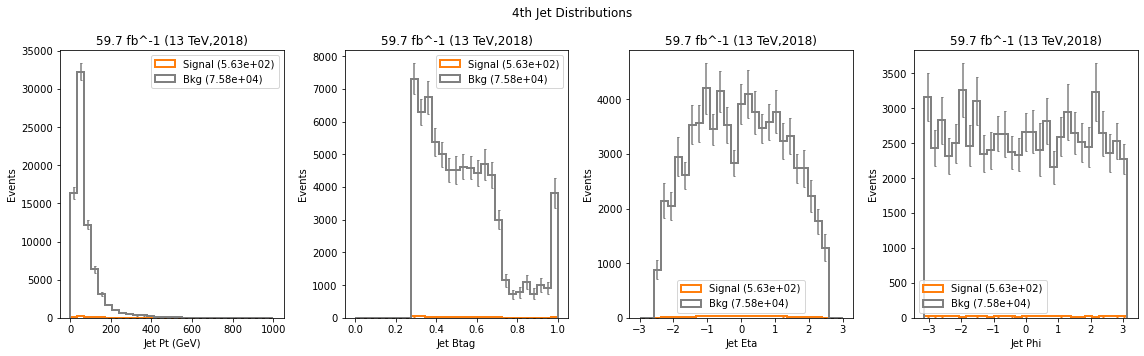

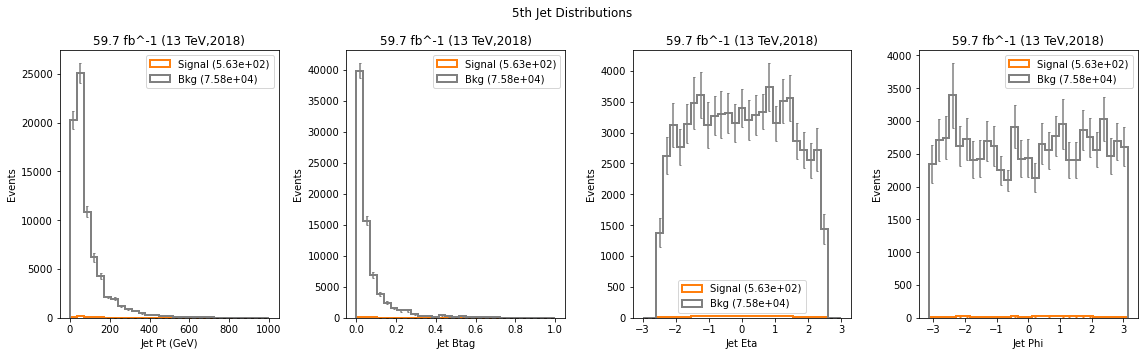

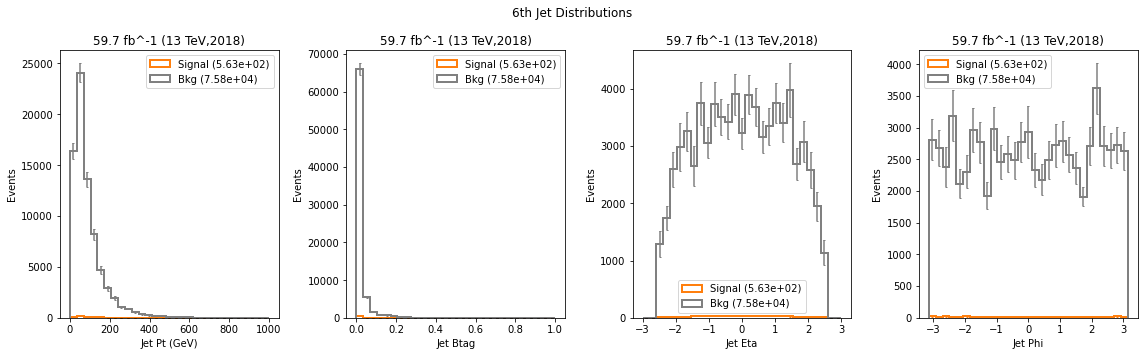

In [21]:
study.ijets(hm_cr_btagsum,saveas="hm_btagsum")